## Are You in the Right Generation as a Developer?

a common topic topic of disscussion recently is the generational differences. in this analysis, i explore the difference between generations of developers based on the data from stack overflow 2019 survey

### Business Undertanding

Questions:

which generation has the most developers? 

which generation is paid most?

which generation is most self taught?

does the eduacation level and employment vary with each generation?

which generation is most satisfied with their programming career?

### Data Understanding

In [1]:
import numpy as np
import pandas as pd
from collections import defaultdict
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#to show all columns of dataframe
pd.set_option('display.max_columns', None)

df = pd.read_csv('survey_results_public.csv')
df1 = pd.read_csv('survey_results_schema.csv')
df

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,EduOther,OrgSize,DevType,YearsCode,Age1stCode,YearsCodePro,CareerSat,JobSat,MgrIdiot,MgrMoney,MgrWant,JobSeek,LastHireDate,LastInt,FizzBuzz,JobFactors,ResumeUpdate,CurrencySymbol,CurrencyDesc,CompTotal,CompFreq,ConvertedComp,WorkWeekHrs,WorkPlan,WorkChallenge,WorkRemote,WorkLoc,ImpSyn,CodeRev,CodeRevHrs,UnitTests,PurchaseHow,PurchaseWhat,LanguageWorkedWith,LanguageDesireNextYear,DatabaseWorkedWith,DatabaseDesireNextYear,PlatformWorkedWith,PlatformDesireNextYear,WebFrameWorkedWith,WebFrameDesireNextYear,MiscTechWorkedWith,MiscTechDesireNextYear,DevEnviron,OpSys,Containers,BlockchainOrg,BlockchainIs,BetterLife,ITperson,OffOn,SocialMedia,Extraversion,ScreenName,SOVisit1st,SOVisitFreq,SOVisitTo,SOFindAnswer,SOTimeSaved,SOHowMuchTime,SOAccount,SOPartFreq,SOJobs,EntTeams,SOComm,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
0,1,I am a student who is learning to code,Yes,Never,The quality of OSS and closed source software ...,"Not employed, and not looking for work",United Kingdom,No,Primary/elementary school,NaN,"Taught yourself a new language, framework, or ...",NaN,NaN,4,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,HTML/CSS;Java;JavaScript;Python,C;C++;C#;Go;HTML/CSS;Java;JavaScript;Python;SQL,SQLite,MySQL,MacOS;Windows,Android;Arduino;Windows,Django;Flask,Flask;jQuery,Node.js,Node.js,IntelliJ;Notepad++;PyCharm,Windows,I do not use containers,NaN,NaN,Yes,"Fortunately, someone else has that title",Yes,Twitter,Online,Username,2017,A few times per month or weekly,Find answers to specific questions;Learn how t...,3-5 times per week,Stack Overflow was much faster,31-60 minutes,No,NaN,"No, I didn't know that Stack Overflow had a jo...","No, and I don't know what those are",Neutral,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,14.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
1,2,I am a student who is learning to code,No,Less than once per year,The quality of OSS and closed source software ...,"Not employed, but looking for work",Bosnia and Herzegovina,"Yes, full-time","Secondary school (e.g. American high school, G...",NaN,Taken an online course in programming or softw...,NaN,"Developer, desktop or enterprise applications;...",NaN,17,NaN,NaN,NaN,NaN,NaN,NaN,I am actively looking for a job,I've never had a job,NaN,NaN,Financial performance or funding status of the...,"Something else changed (education, award, medi...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C++;HTML/CSS;Python,C++;HTML/CSS;JavaScript;SQL,NaN,MySQL,Windows,Windows,Django,Django,NaN,NaN,Atom;PyCharm,Windows,I do not use containers,NaN,Useful across many domains and could change ma...,Yes,Yes,Yes,Instagram,Online,Username,2017,Daily or almost daily,Find answers to specific questions;Learn how t...,3-5 times per week,Stack Overflow was much faster,11-30 minutes,Yes,A few times per month or weekly,"No, I knew that Stack Overflow had a job board...","No, and I don't know what those are","Yes, somewhat",Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,19.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
2,3,"I am not primarily a developer, but I write co...",Yes,Never,The quality of OSS and closed source software ...,Employed full-time,Thailand,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Web development or web design,"Taught yourself a new language, framework, or ...",100 to 499 employees,"Designer;Developer, back-end;Developer, front-...",3,22,1,Slightly satisfied,Slightly satisfied,Not at all confident,Not sure,Not sure,"I’m not actively looking, but I am open to new...",1-2 years ago,Interview with people in peer roles,No,"Languages, frameworks, and other technolo

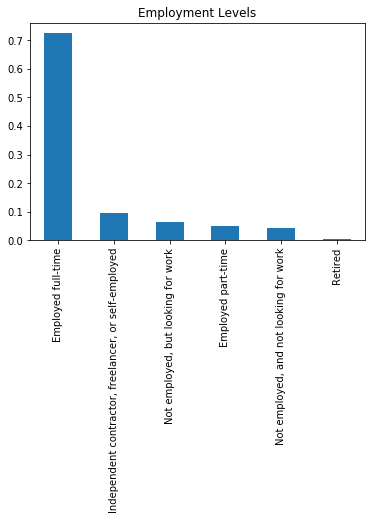

In [2]:
 #Data Understanding
(df['Employment'].value_counts()/df.shape[0]).plot(kind='bar');
plt.title('Employment Levels');

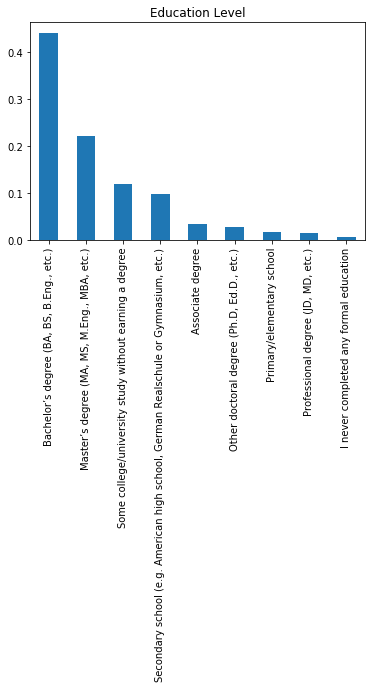

In [3]:
 #Data Understanding
(df['EdLevel'].value_counts()/df.shape[0]).plot(kind='bar');
plt.title('Education Level');

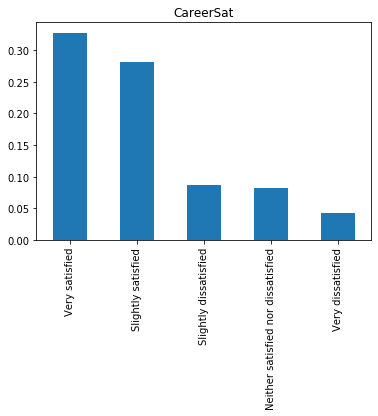

In [4]:
 #Data Understanding
(df['CareerSat'].value_counts()/df.shape[0]).plot(kind='bar');
plt.title('CareerSat');

### Data Preperation

In [8]:
def Generation(age): 
    
    age = int(age)
    
    if age in range(7,23):
        generation = 'Generation Z'
    
    elif age in range(23,39):
        generation = 'Millenial'
    
    elif age in range(39,55):
        generation = 'Generation X'
    
    elif age in range(55,74):
        generation = 'Boomer'
        
    elif age in range(74,92):
        generation = 'Silent'
    else: 
        generation = 'Other'

    return generation 

#rows with null age values are removed from df
df = df.dropna(subset=['Age'], how='any')
df['Generation'] = df['Age'].apply(Generation)
df.drop(df.index[df['Generation'] == 'Other'], inplace = True)

the following columns are selected for analysis in addition to the formed Generation column:

Employment

CareerSat

EdLevel

EduOther

ConvertedComp

In [9]:
new_df=df[['Generation','Employment','CareerSat','EdLevel','EduOther','ConvertedComp']]
new_df

,Generation,Employment,CareerSat,EdLevel,EduOther,ConvertedComp
0,Generation Z,"Not employed, and not looking for work",NaN,Primary/elementary school,"Taught yourself a new language, framework, or ...",NaN
1,Generation Z,"Not employed, but looking for work",NaN,"Secondary school (e.g. American high school, G...",Taken an online course in programming or softw...,NaN
2,Millenial,Employed full-time,Slightly satisfied,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Taught yourself a new language, framework, or ...",8820.0
3,Generation Z,Employed full-time,Very satisfied,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Taken an online course in programming or softw...,61000.0
4,Millenial,Employed full-time,Very dissatisfied,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Taken an online course in programming or softw...,NaN
...,...,...,...,...,...,...
88870,Boomer,"Not employed, and not looking for work",NaN,"Bachelor’s degree (BA, BS, B.Eng., etc.)",NaN,NaN
88871,Generation Z,"Independent contractor, freelancer, or self-em...",NaN,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Taken an online course in programming or softw...,NaN
88872,Millenial,Employed part-time,NaN,"Master’s degree (MA, MS, M.Eng., MBA, etc.)","Taught yourself a new language, framework, or ...",NaN
88876,Generation X,Employed full-time,NaN,"Secondary school (e.g. American high school, G...","Taught yourself a new language, framework, or ...",NaN


In [10]:
def handle_CareerSat(df):
    #null values are replaced with zero to calculate the mean
    CareerSat_map = {
        'Very satisfied' : 5,
        'Slightly satisfied' : 4,
        'Neither satisfied nor dissatisfied' : 3,
        'Slightly dissatisfied' : 2,
        'Very dissatisfied' : 1,
        np.nan: 0
    }
    
    new_df['CareerSat'] = new_df['CareerSat'].apply(lambda x: CareerSat_map[x] )
    
    return new_df

In [11]:
df_CS_handled=handle_CareerSat(df)
df_CS_handled

/Users/rawan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


,Generation,Employment,CareerSat,EdLevel,EduOther,ConvertedComp
0,Generation Z,"Not employed, and not looking for work",0,Primary/elementary school,"Taught yourself a new language, framework, or ...",NaN
1,Generation Z,"Not employed, but looking for work",0,"Secondary school (e.g. American high school, G...",Taken an online course in programming or softw...,NaN
2,Millenial,Employed full-time,4,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Taught yourself a new language, framework, or ...",8820.0
3,Generation Z,Employed full-time,5,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Taken an online course in programming or softw...,61000.0
4,Millenial,Employed full-time,1,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Taken an online course in programming or softw...,NaN
...,...,...,...,...,...,...
88870,Boomer,"Not employed, and not looking for work",0,"Bachelor’s degree (BA, BS, B.Eng., etc.)",NaN,NaN
88871,Generation Z,"Independent contractor, freelancer, or self-em...",0,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Taken an online course in programming or softw...,NaN
88872,Millenial,Employed part-time,0,"Master’s degree (MA, MS, M.Eng., MBA, etc.)","Taught yourself a new language, framework, or ...",NaN
88876,Generation X,Employed full-time,0,"Secondary school (e.g. American high school, G...","Taught yourself a new language, framework, or ...",NaN


In [13]:
new_df['EduOther'].groupby(new_df['Generation']).count()

Generation
Boomer           1646
Generation X    10332
Generation Z    12313
Millenial       51660
Silent             57
Name: EduOther, dtype: int64

In [14]:
new_df.Generation.value_counts()

Millenial       53720
Generation Z    13047
Generation X    10608
Boomer           1708
Silent             65
Name: Generation, dtype: int64

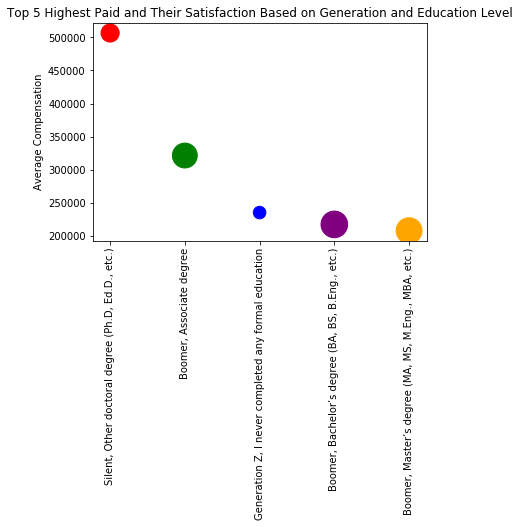

In [224]:
ndf=new_df.groupby(['Generation', 'EdLevel']).mean().reset_index().sort_values(by=['ConvertedComp'],ascending=False)
nndf=ndf.head().reset_index()
nndf=nndf.drop('index',axis=1)
nndf['concatenated'] = nndf['Generation'].str.cat(nndf['EdLevel'],sep=", ")
plt.scatter(nndf['concatenated'], nndf['ConvertedComp'],nndf.CareerSat*200,c=['red','green','blue','purple','orange'])
#plt.plot(nndf['concatenated'],nndf['ConvertedComp'],nndf.CareerSat.mean() ,marker='o', c='crimson')
plt.xticks(rotation=90)
plt.ylabel('Average Compensation')
plt.title('Top 5 Highest Paid and Their Satisfaction Based on Generation and Education Level')
plt.show()

In [16]:
ddf = new_df.groupby(['Generation', 'EdLevel','Employment']).mean().reset_index().sort_values(by=['ConvertedComp'],ascending=False)
ddf = ddf.dropna(subset=['ConvertedComp'], how='any')
ddf

,Generation,EdLevel,Employment,CareerSat,ConvertedComp
201,Silent,"Other doctoral degree (Ph.D, Ed.D., etc.)",Employed full-time,5.000000,1000000.000000
58,Generation X,I never completed any formal education,"Independent contractor, freelancer, or self-em...",4.111111,517662.600000
1,Boomer,Associate degree,"Independent contractor, freelancer, or self-em...",3.166667,422964.166667
104,Generation Z,I never completed any formal education,Employed full-time,2.736842,294348.888889
0,Boomer,Associate degree,Employed full-time,4.258065,276114.888889
...,...,...,...,...,...
127,Generation Z,"Professional degree (JD, MD, etc.)","Independent contractor, freelancer, or self-em...",2.000000,11660.000000
112,Generation Z,"Master’s degree (MA, MS, M.Eng., MBA, etc.)","Independent contractor, freelancer, or self-em...",2.535714,9592.500000
105,Generation Z,I never completed any formal education,Employed part-time,1.333333,8700.000000
72,Generation X,Primary/elementary school,Employed part-time,1.000000,7956.000000


Text(0, 0.5, 'Average Compensation')

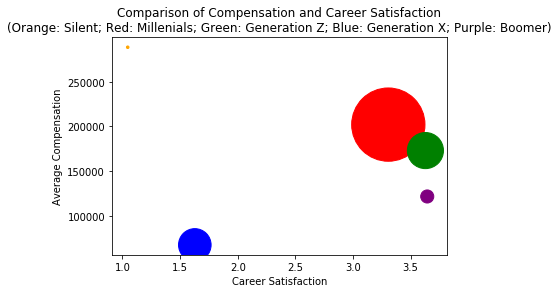

In [41]:
plt.scatter(new_df.groupby('Generation').mean().CareerSat, new_df.groupby('Generation').mean().ConvertedComp, (new_df.Generation.value_counts())/10,c=['red','green','blue','purple','orange'])

plt.title('Comparison of Compensation and Career Satisfaction\n(Orange: Silent; Red: Millenials; Green: Generation Z; Blue: Generation X; Purple: Boomer)')
plt.xlabel('Career Satisfaction')
plt.ylabel('Average Compensation')

### Results Evaluation

Question 1: Which generation has the most developers? 

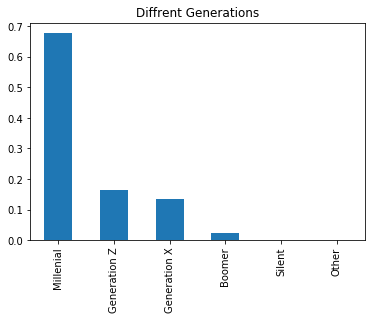

In [48]:
(df['Generation'].value_counts()/df.shape[0]).plot(kind='bar');
plt.title('Diffrent Generations');

Question 3: which generation is most self taught?

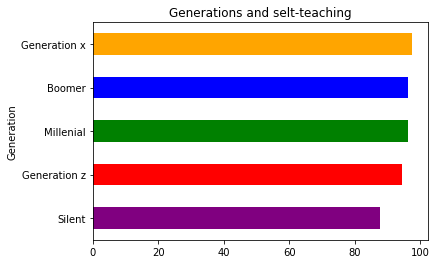

In [91]:
df_gen = new_df['Generation'];
m=100*51660/(df_gen[df_gen == "Millenial"].value_counts());
z=100*12313/(df_gen[df_gen == "Generation Z"].value_counts());
x=100*10332/(df_gen[df_gen == "Generation X"].value_counts());
b=100*1646/(df_gen[df_gen == "Boomer"].value_counts());
s=100*57/(df_gen[df_gen == "Silent"].value_counts());

gdf=pd.DataFrame([['Millenial',m[0]],['Generation z',z[0]], ['Generation x',x[0]],['Boomer',b[0]],['Silent',s[0]]],columns=['Generation','%'])
gdf=gdf.sort_values(by='%')
gdf.plot.barh(x='Generation',y='%',legend=None,color=['purple', 'red', 'green', 'blue', 'orange'], title='Generations and selt-teaching')

Question 4: does the eduacation level and employment vary with each generation?

In [42]:
dddf = new_df.groupby(['Generation', 'EdLevel']).mean()
dddf

CareerSat  \
Generation   EdLevel                                                         
Boomer       Associate degree                                     3.085714   
             Bachelor’s degree (BA, BS, B.Eng., etc.)             3.539809   
             I never completed any formal education               3.285714   
             Master’s degree (MA, MS, M.Eng., MBA, etc.)          3.346067   
             Other doctoral degree (Ph.D, Ed.D., etc.)            3.341317   
             Primary/elementary school                            3.000000   
             Professional degree (JD, MD, etc.)                   2.441860   
             Secondary school (e.g. American high school, Ge...   2.516129   
             Some college/university study without earning a...   3.217021   
Generation X Associate degree                                     3.521622   
             Bachelor’s degree (BA, BS, B.Eng., etc.)             3.706879   
             I never completed any formal education               3.094340   
             Master’s degree (MA, MS, M.Eng., MBA, etc.)          3.640236   
             Other doctoral degree (Ph.D, Ed.D., etc.)            3.697289   
             Primary/elementary school                            2.711111   
             Professional degree (JD, MD, etc.)                   3.198980   
             Secondary school (e.g. American high school, Ge...   3.382688   
             Some college/university study without earning a...   3.603480   
Generation Z Associate degree                                     2.440882   
             Bachelor’s degree (BA, BS, B.Eng., etc.)             2.526710   
             I never completed any formal education               0.786408   
             Master’s degree (MA, MS, M.Eng., MBA, etc.)          2.537190   
             Other doctoral degree (Ph.D, Ed.D., etc.)            2.555556   
             Primary/elementary school                            0.456062   
             Professional degree (JD, MD, etc.)                   2.662338   
             Secondary school (e.g. American high school, Ge...   1.083415   
             Some college/university study without earning a...   1.882116   
Millenial    Associate degree                                     3.545455   
             Bachelor’s degree (BA, BS, B.Eng., etc.)             3.706061   
             I never completed any formal education               3.421296   
             Master’s degree (MA, MS, M.Eng., MBA, etc.)          3.703768   
             Other doctoral degree (Ph.D, Ed.D., etc.)            3.874313   
             Primary/elementary school                            3.004184   
             Professional degree (JD, MD, etc.)                   3.310391   
             Secondary school (e.g. American high school, Ge...   3.134163   
             Some college/university study without earning a...   3.488921   
Silent       Bachelor’s degree (BA, BS, B.Eng., etc.)             0.312500   
             I never completed any formal education               4.000000   
             Master’s degree (MA, MS, M.Eng., MBA, etc.)          0.888889   
             Other doctoral degree (Ph.D, Ed.D., etc.)            1.642857   
             Professional degree (JD, MD, etc.)                   0.000000   
             Secondary school (e.g. American high school, Ge...   3.000000   
             Some college/university study without earning a...   1.166667   

                                                                 ConvertedComp  
Generation   EdLevel                                                            
Boomer       Associate degree                                    321299.282051  
             Bachelor’s degree (BA, BS, B.Eng., etc.)            217081.325700  
             I never completed any formal education              146290.800000  
             Master’s degree (MA, MS, M.Eng., MBA, etc.)         207581.603846  
             Other doctoral degree (Ph.D, Ed.D., etc.)           187

Question 5: which generation is most satisfied with their programming career?

Question 2: which generation is paid most?

Text(0, 0.5, 'Average Compensation')

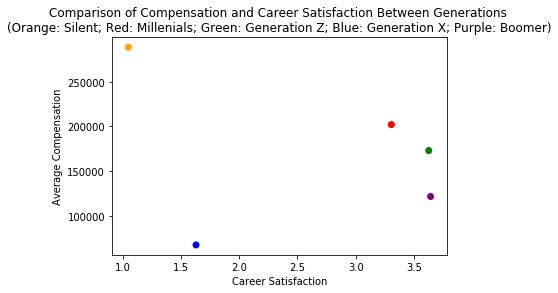

In [82]:
compareSat = df_CS_handled.groupby(['Generation']).mean()
compareSat.sort_values(by=['CareerSat'], inplace=True, ascending=False)
compareSat
plt.scatter(new_df.groupby('Generation').mean().CareerSat, new_df.groupby('Generation').mean().ConvertedComp,c=['red','green','blue','purple','orange'])
plt.title('Comparison of Compensation and Career Satisfaction Between Generations \n(Orange: Silent; Red: Millenials; Green: Generation Z; Blue: Generation X; Purple: Boomer)')
plt.xlabel('Career Satisfaction')
plt.ylabel('Average Compensation')

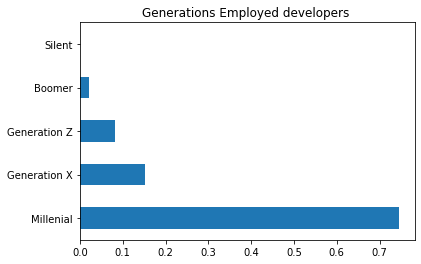

In [166]:
#bar plot of the level of education of employed developers
df_employment= new_df.loc[(df['Employment']== 'Employed full-time')|(new_df['Employment']=='Independent contractor, freelancer, or self-employed')]
df_employment=df_employment.Generation.value_counts(normalize=True)
df_employment.plot.barh(title='Generations Employed developers ')

Text(0.5, 1.0, 'Education Level of Employed Developers')

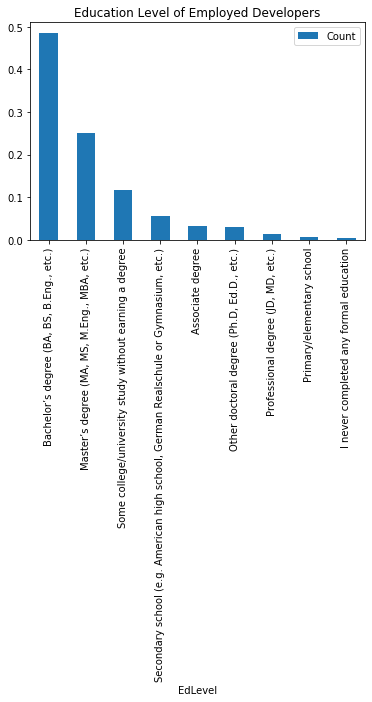

In [155]:
#bar plot of the level of education of employed developers
df_employment= new_df.loc[(df['Employment']== 'Employed full-time')| (new_df['Employment']=='Independent contractor, freelancer, or self-employed')]
count=df_employment['EdLevel'].value_counts(normalize=True).reset_index()
count.rename(columns={'index': 'EdLevel', 'EdLevel': 'Count'}, inplace=True)
count.plot.bar(x='EdLevel', y='Count')

plt.title('Education Level of Employed Developers')

Text(0.5, 1.0, 'Education Level of Unemployed Developers')

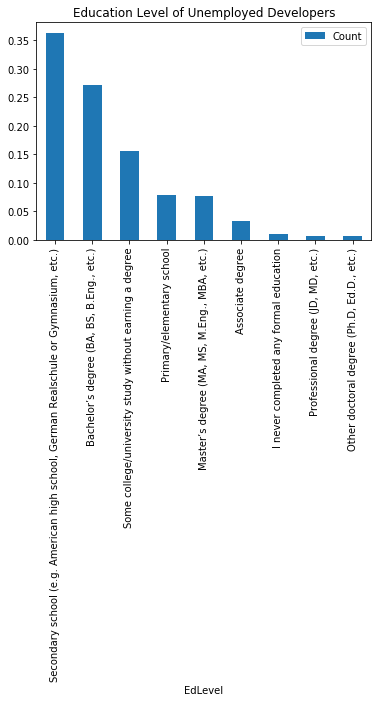

In [31]:
df_notEmployed = df.loc[(df['Employment']== 'Not employed, and not looking for work') | (df['Employment']== 'Not employed, but looking for work')]
count1=df_notEmployed['EdLevel'].value_counts(normalize=True).reset_index()
count1.rename(columns={'index': 'EdLevel', 'EdLevel': 'Count'}, inplace=True)
count1.plot.bar(x='EdLevel', y='Count')
plt.title('Education Level of Unemployed Developers')

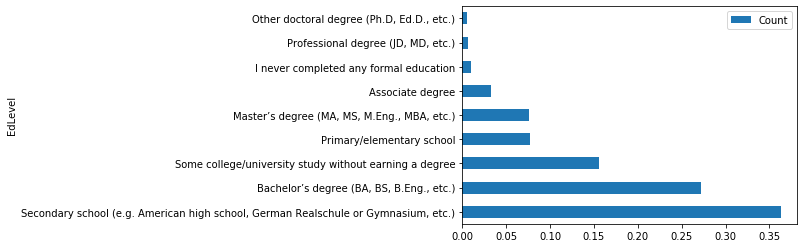

In [64]:
#bar plot of the level of education of not employed developers
df_EFT1 = df.loc[(df['Employment']== 'Not employed, and not looking for work') | (df['Employment']== 'Not employed, but looking for work')]
count1=df_EFT1['EdLevel'].value_counts(normalize=True).reset_index()
count1.rename(columns={'index': 'EdLevel', 'EdLevel': 'Count'}, inplace=True)
count1.plot.barh(x='EdLevel', y='Count')

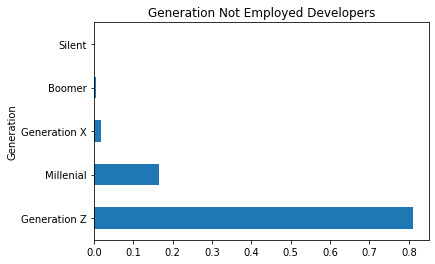

In [170]:
df_notemployed = new_df.loc[(new_df['Employment'] == 'Not employed, and not looking for work') | (new_df['Employment'] == 'Not employed, but looking for work ')]
count1=df_notemployed['Generation'].value_counts(normalize=True).reset_index()
count1.rename(columns={'index': 'Generation', 'Generation': 'Count'}, inplace=True)
count1.plot.barh(x='Generation', y='Count', title='Generation Not Employed Developers',legend=None)

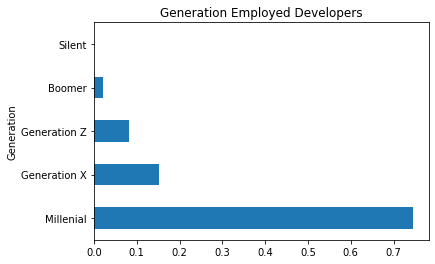

In [171]:
df_employed = new_df.loc[(new_df['Employment']== 'Employed full-time')| (new_df['Employment']=='Independent contractor, freelancer, or self-employed')]
count1=df_employed['Generation'].value_counts(normalize=True).reset_index()
count1.rename(columns={'index': 'Generation', 'Generation': 'Count'}, inplace=True)
count1.plot.barh(x='Generation', y='Count',title='Generation Employed Developers',legend=None)